In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [24]:
housing=fetch_california_housing()

In [25]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [22]:
housing

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [26]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [30]:
X=pd.DataFrame(housing.data,columns=housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [31]:
y=pd.DataFrame(housing.target,columns=['Target'])

In [33]:
y.head()

,Target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [35]:
X.shape

(20640, 8)

In [36]:
y.shape

(20640, 1)

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [40]:
X.drop(['Latitude','Longitude'],axis=1,inplace=True)
# latitide and longitude is dropped because its irrerevant of the regression analysis req. for the said case 

KeyError: "['Latitude', 'Longitude'] not found in axis"

In [41]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [42]:
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [43]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 6)
(5160, 6)
(11610, 6)
(3870, 6)


In [44]:
X_train.shape[1]

6

In [45]:
Layers=[
    tf.keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1)

]

In [46]:
model=tf.keras.models.Sequential(Layers)

In [47]:
LOSS='mse'
OPTIMIZER='sgd'
model.compile(optimizer=OPTIMIZER,loss=LOSS)

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                210       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [51]:
sum((30*6+30,10*30+10,5*10+5,1*5+1)) # total parameters 

581

In [52]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [57]:
EPOCHS=20
history=model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4178 - val_loss: 0.4089
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4170 - val_loss: 0.4341
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4164 - val_loss: 0.4284
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4160 - val_loss: 0.4404
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4126 - val_loss: 0.4171
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4133 - val_loss: 0.4077
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4118 - val_loss: 0.3908
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4110 - val_loss: 0.4394
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4108 - val_loss: 0.4247
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4106 - val_loss: 0.4380

In [58]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.417813,0.408908
1,0.416996,0.434136
2,0.416407,0.428360
3,0.416024,0.440434
4,0.412625,0.417066
5,0.413305,0.407688
6,0.411831,0.390751
7,0.411031,0.439450
8,0.410770,0.424665
9,0.410564,0.437967


<AxesSubplot: >

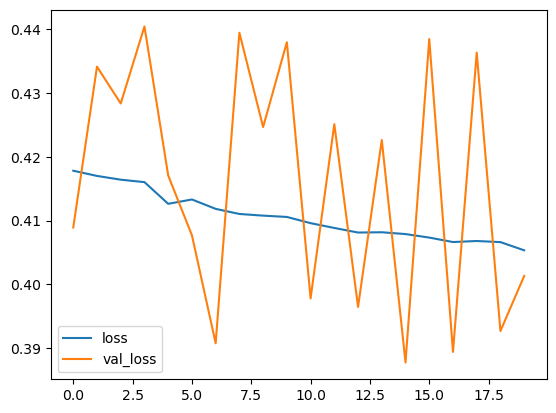

In [59]:
pd.DataFrame(history.history).plot()

In [60]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4104


0.41038933396339417

In [61]:
X_test.shape

(5160, 6)

In [63]:
new=X_test[0]
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735])

In [64]:
new.shape

(6,)

In [65]:
new.reshape((1,6)).shape

(1, 6)

In [68]:
model.predict(new.reshape((1,6)))

1/1 [==============================] - 0s 111ms/step


array([[0.91360384]], dtype=float32)

# Model with CAllback

In [76]:
model_2 = tf.keras.models.Sequential(Layers)

LOSS = "mse"
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)

model_2.compile(loss=LOSS , optimizer=OPTIMIZER)

EPOCHS = 20

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]


history = model_2.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_valid, y_valid), callbacks = CALLBACKS)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0238 - val_loss: 1.2997
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7401 - val_loss: 0.6811
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6495 - val_loss: 0.6257
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6157 - val_loss: 0.5890
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5924 - val_loss: 0.5613
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5739 - val_loss: 0.5475
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5588 - val_loss: 0.5303
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5465 - val_loss: 0.5212
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5365 - val_loss: 0.5128
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5278 - val_loss: 0.5081

In [77]:
%load_ext tensorboard

In [78]:
%tensorboard --logdir="logs"